# Film development for PProductions: predicting IMDb ratings, pt. 1

## Author: Letícia Zorzi Rama

## Project goal

Perform an analysis on a film database to guide PProductions on which type of film should be developed next by predicting IMDb ratings.

#### Summary
1. Project setup, pt. 1 (this notebook)
2. Exploratory Data Analysis - EDA (this notebook)
3. Project setup, pt. 2 (PProductions_Prediction.ipynb)
4. Predicting from the data (PProductions_Prediction.ipynb)

## 1. Project setup, pt. 1

This part consists of:
1. Imports
2. Loading the `imdb` dataset
3. Basic checks (format, header, column names, data types, NaN values, skewed variables) and general data processing (renaming columns)
4. Data processing: after basic checking, process column by column with the specific treatments
5. Final checks
6. Data augmentation: enrich the IMDb dataset with budget, and revenue features from [The Movie Databse - TMDB](https://www.themoviedb.org)

The enriched dataset named `imdb_tmdb` will be the dataset used in the project. So, the final step of this setup is:

7. Loading the `imdb_tmdb` dataset
8. Checking and processing new added columns
9. Final checks

#### 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

#### 2. Loading the `imdb` dataset

In [2]:
# Loading dataset
df = pd.read_csv("desafio_indicium_imdb.csv")

#### 3. Basic checks

In [3]:
# Basic checking - Shape
print(df.shape)

(999, 16)


In [4]:
# Basic checking - Head
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [5]:
# Basic checking - Columns names and its Data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
None


In [6]:
# Data processing - Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Checking renamed columns
df.columns

Index(['unnamed:_0', 'series_title', 'released_year', 'certificate', 'runtime',
       'genre', 'imdb_rating', 'overview', 'meta_score', 'director', 'star1',
       'star2', 'star3', 'star4', 'no_of_votes', 'gross'],
      dtype='object')

In [7]:
# Basic checking - NaN values
print(df.isna().sum())

# NaN values in: Certificate, Meta score, and Gross

unnamed:_0         0
series_title       0
released_year      0
certificate      101
runtime            0
genre              0
imdb_rating        0
overview           0
meta_score       157
director           0
star1              0
star2              0
star3              0
star4              0
no_of_votes        0
gross            169
dtype: int64


#### 4. Data processing - column by column

##### `released_year`

In [8]:
# Data Processing - Convert Data types

# 'released_year': as integer, first 'Int64' 
df['released_year'] = pd.to_numeric(df['released_year'], errors='coerce').astype('Int64')

In [9]:
# Checking values after convert to integer

# Checking the movie 
df[df.released_year.isna()]

# 1 <NA> value
# Identify the movie, search the released year and insert it

,unnamed:_0,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross
965,966,Apollo 13,<NA>,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [10]:
# 'Apollo 13' released in 1995 (according to Wikipedia)
# Filling <NA> value with 1995
df.loc[df['series_title'] == 'Apollo 13', 'released_year'] = 1995

# Checking
df.released_year.isna().sum()

np.int64(0)

In [11]:
# Data Processing - Convert Data types

# 'released_year': now as 'int64' 
df['released_year'] = pd.to_numeric(df['released_year'], errors='coerce').astype('int64')

##### `certificate`

In [12]:
# Data processing - NaN values 
# 101 NaN values
# Since it's a categorical column, fill with the mode

# Finding the mode...but discovering a mix of certifications systems
df.groupby(['certificate']).size()

# According to IMDb, the USA/Hollywood official certificate system is the MPA system (G, PG, PG-13, R, NC-17)
# Standardize the dataset, with the related certificates between other system and the MPA

# Mapping dictionary for the MPA system
map_mpa = {
    "16": "R",
    "A": "R",
    "Approved": "G",
    "GP": "PG",
    "Passed": "G",
    "TV-14": "PG-13",
    "TV-MA": "R",
    "TV-PG": "PG",
    "U": "G",
    "U/A": "PG",
    "UA": "PG",
    # Keeping the originals
    "G": "G",
    "PG": "PG",
    "PG-13": "PG-13",
    "R": "R",
    "Unrated": "Unrated"
}

# Apply the mapping
df["certificate"] = df["certificate"].replace(map_mpa)

In [13]:
# Finding the mode
df.groupby(['certificate']).size()

certificate
G          291
PG         218
PG-13       44
R          344
Unrated      1
dtype: int64

In [14]:
# Now, filling NaN values with the mode
df['certificate'] = df['certificate'].fillna('R')

# Checking
print(df.certificate.isna().sum())

0


##### `runtime`

In [15]:
# Data Processing - Convert Data types

# 'runtime': extract minutes from strings like '142 min'
df['runtime'] = df['runtime'].str.extract(r'(\d+)').astype(float)

In [16]:
# Checking distribution - Summary descriptive statistics
df.runtime.describe()

# 'runtime' looks fine

count    999.000000
mean     122.871872
std       28.101227
min       45.000000
25%      103.000000
50%      119.000000
75%      137.000000
max      321.000000
Name: runtime, dtype: float64

<Axes: xlabel='runtime', ylabel='Count'>

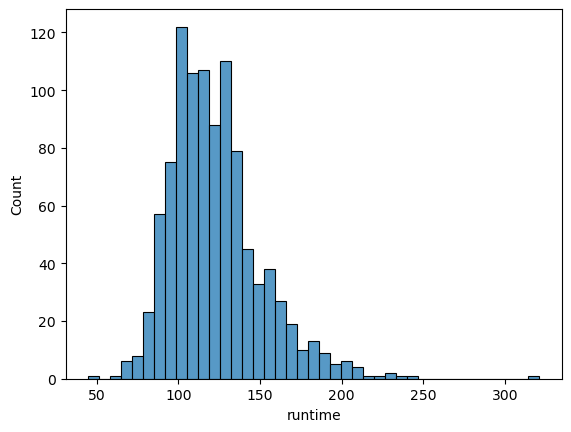

In [17]:
# Checking distribution - Histogram
sns.histplot(df.runtime)

# 'runtime' looks fine

##### `genre` and `main_genre`

In [18]:
# Checking how gender is categorized
genres = df.genre.unique()

# Checking how gender is categorized, taking 'Crime' as a sample
crime = [crime for crime in genres if 'Crime' in crime]
crime

# Genre is mostly multi-genre

['Crime, Drama',
 'Action, Crime, Drama',
 'Biography, Crime, Drama',
 'Crime, Drama, Fantasy',
 'Crime, Drama, Mystery',
 'Crime, Drama, Thriller',
 'Crime, Mystery, Thriller',
 'Crime, Drama, Music',
 'Comedy, Crime',
 'Comedy, Crime, Drama',
 'Crime, Drama, Sci-Fi',
 'Crime, Drama, Film-Noir',
 'Action, Comedy, Crime',
 'Action, Biography, Crime',
 'Crime, Thriller',
 'Adventure, Comedy, Crime',
 'Comedy, Crime, Romance',
 'Comedy, Crime, Sport',
 'Action, Crime, Thriller',
 'Crime, Drama, Romance',
 'Crime, Drama, Musical',
 'Animation, Crime, Mystery',
 'Action, Crime, Comedy',
 'Animation, Action, Crime',
 'Crime, Drama, Horror',
 'Comedy, Crime, Thriller',
 'Comedy, Crime, Mystery',
 'Crime, Film-Noir, Thriller',
 'Crime, Film-Noir, Mystery',
 'Animation, Biography, Crime',
 'Adventure, Biography, Crime',
 'Crime, Drama, History',
 'Animation, Comedy, Crime',
 'Action, Adventure, Crime',
 'Action, Crime, Mystery']

In [19]:
# Engineered Column - 'main_genre'
# Split first listed genre makes group comparisons clear
df['main_genre'] = df['genre'].str.split(",").str[0].str.strip()

##### `imdb_rating`

In [20]:
# Checking distribution - Summary descriptive statistics
df.imdb_rating.describe()

count    999.000000
mean       7.947948
std        0.272290
min        7.600000
25%        7.700000
50%        7.900000
75%        8.100000
max        9.200000
Name: imdb_rating, dtype: float64

<Axes: xlabel='imdb_rating', ylabel='Count'>

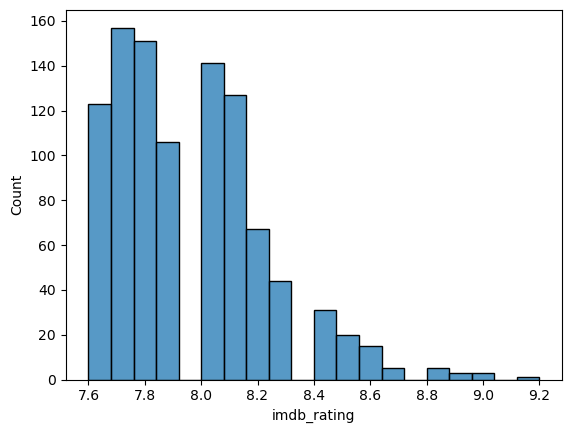

In [21]:
# Checking distribution - Histogram
sns.histplot(df.imdb_rating)

# 'imdb_rating' is right-skewed, but it won't be normalized, since it's the prediction target 

##### `overview` and `overview_len`

In [22]:
# Engineered Column - 'overview_len'
# Counting words to create a numerical proxy for how detailed the description is
# This will later help to explore overview correlations

df['overview_len'] = df['overview'].astype(str).apply(lambda x: len(x.split()))

##### `meta_score`

In [23]:
# Data processing - NaN values
# 157 NaN values
# Since it's a numeric column, fill with the median

# Filling NaN values
df['meta_score'] = df['meta_score'].fillna(df['meta_score'].median())

# Checking
print(df.meta_score.isna().sum())

0


In [24]:
# Checking distribution - Summary descriptive statistics 
df.meta_score.describe()

count    999.000000
mean      78.131131
std       11.373766
min       28.000000
25%       72.000000
50%       79.000000
75%       85.500000
max      100.000000
Name: meta_score, dtype: float64

<Axes: xlabel='meta_score', ylabel='Count'>

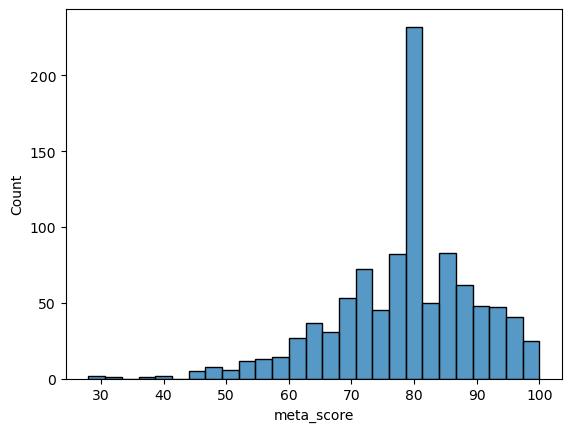

In [25]:
# Checking distribution - Histogram
sns.histplot(df.meta_score)

# 'meta_score' is left-skewed, but it won't be normelized yet
# Outliers were kept

##### `no_of_votes` and `log_votes`

In [26]:
# Checking distribution - Summary descriptive statistics
df.no_of_votes.describe()

count    9.990000e+02
mean     2.716214e+05
std      3.209126e+05
min      2.508800e+04
25%      5.547150e+04
50%      1.383560e+05
75%      3.731675e+05
max      2.303232e+06
Name: no_of_votes, dtype: float64

<Axes: xlabel='no_of_votes', ylabel='Count'>

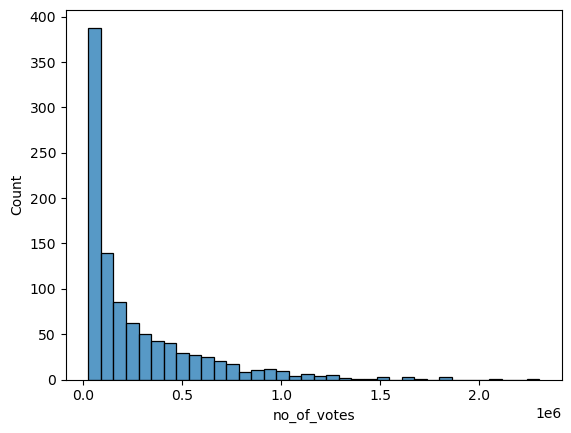

In [27]:
# Checking distribution - Histogram

sns.histplot(df.no_of_votes)

# 'no_of_votes' is heavily right-skewed

<Axes: xlabel='log_votes', ylabel='Count'>

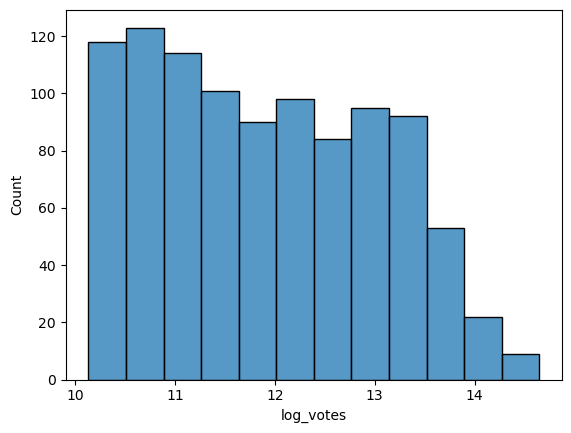

In [28]:
# Data Processing - Skewed variables 
# Applying log1p to compress the scale and make the distribution closer to normal

# Engineered Column - 'log_votes'
df['log_votes'] = np.log1p(df['no_of_votes'])

# Checking the distribution 
sns.histplot(df.log_votes)

# Outliers were kept

##### `gross` and `log_gross`

In [29]:
# Data Processing - Convert Data types

# Gross: remove commas/dollar signs, convert to numeric
df['gross'] = (
    df['gross']
    .astype(str)
    .str.replace(",", "")
    .str.replace("$", "")
    .astype(float)
)

In [30]:
# Data processing - NaN values
# 169 NaN values
# Since it's a numeric column, fill with the median

# Filling NaN values
df['gross'] = df['gross'].fillna(df['gross'].median())

# Checking
print(df.gross.isna().sum())

0


In [31]:
# Checking distribution - Summary descriptive statistics
df.gross.describe()

count    9.990000e+02
mean     6.053338e+07
std      1.014694e+08
min      1.305000e+03
25%      5.011838e+06
50%      2.345744e+07
75%      6.157656e+07
max      9.366622e+08
Name: gross, dtype: float64

<Axes: xlabel='gross', ylabel='Count'>

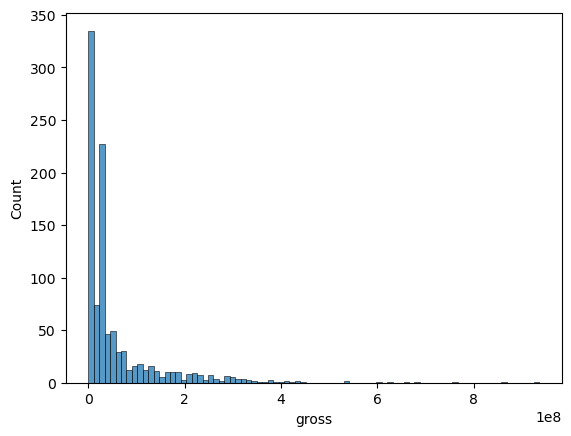

In [32]:
# Checking distribution - Histogram

sns.histplot(df.gross)

# 'gross' is heavily right-skewed

<Axes: xlabel='log_gross', ylabel='Count'>

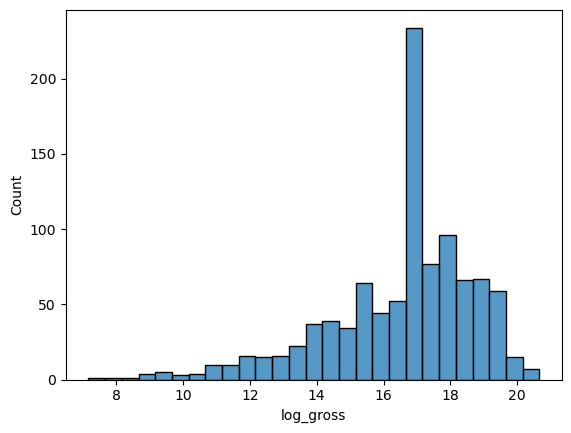

In [33]:
# Data Processing - Skewed variables 
# Applying log1p to compress the scale and make the distribution closer to normal

# Engineered Column - 'log_gross'
df['log_gross'] = np.log1p(df['gross'])

# Checking the distribution 
sns.histplot(df.log_gross)

# Outliers were kept

#### 5. Final checks

In [34]:
# Final checking - NaN values
print(df.isna().sum().sum())

0


In [35]:
# Final checking - Column names and its Data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   unnamed:_0     999 non-null    int64  
 1   series_title   999 non-null    object 
 2   released_year  999 non-null    int64  
 3   certificate    999 non-null    object 
 4   runtime        999 non-null    float64
 5   genre          999 non-null    object 
 6   imdb_rating    999 non-null    float64
 7   overview       999 non-null    object 
 8   meta_score     999 non-null    float64
 9   director       999 non-null    object 
 10  star1          999 non-null    object 
 11  star2          999 non-null    object 
 12  star3          999 non-null    object 
 13  star4          999 non-null    object 
 14  no_of_votes    999 non-null    int64  
 15  gross          999 non-null    float64
 16  main_genre     999 non-null    object 
 17  overview_len   999 non-null    int64  
 18  log_votes 

In [36]:
# Final checking - Head
df.head()

,unnamed:_0,series_title,released_year,certificate,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,no_of_votes,gross,main_genre,overview_len,log_votes,log_gross
0,1,The Godfather,1972,R,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime,16,14.298164,18.720537
1,2,The Dark Knight,2008,PG,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action,33,14.649824,20.097513
2,3,The Godfather: Part II,1974,R,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,Crime,29,13.937687,17.863811
3,4,12 Angry Men,1957,G,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,Crime,18,13.444224,15.287983
4,5,The Lord of the Rings: The Return of the King,2003,G,201.0,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,Action,28,14.311888,19.749997


In [37]:
# Final checking - Shape
df.shape

(999, 20)

#### 6. Data augmentation 
Generating the `imdb_tmdb` dataset.

**OBS.:** The code below is not meant to be executed. It is included only to illustrate the step of generating the enriched dataset by fetching budget and revenue features from TMDB and merging them into the existing dataset. The resulting dataset was saved as `imdb_tmdb.csv` and is provided in the project files.

In [38]:
# # Fetching budgets/revenues from The Movie Database (TMDB)

# TMDB_API_KEY = "TMDB_KEY""

# def fetch_tmdb_info(title, year):
#     """
#     Search TMDB by title + year.
#     Returns dict with budget, revenue, runtime, etc.
#     """
#     url = "https://api.themoviedb.org/3/search/movie"
#     params = {
#         "api_key": TMDB_API_KEY,
#         "query": title,
#         "year": year
#     }
#     resp = requests.get(url, params=params)
#     if resp.status_code == 200:
#         data = resp.json()
#         results = data.get("results", [])
#         if results:
#             # take the top result
#             movie_id = results[0]["id"]
#             # fetch detailed info for that movie
#             detail_url = f"https://api.themoviedb.org/3/movie/{movie_id}"
#             detail_params = {"api_key": TMDB_API_KEY}
#             detail_resp = requests.get(detail_url, params=detail_params)
#             if detail_resp.status_code == 200:
#                 return detail_resp.json()
#     return None

# # Collect budgets & revenues
# budgets = []
# revenues = []

# for idx, row in tqdm(df.iterrows(), total=df.shape[0]):
#     rec = fetch_tmdb_info(row["series_title"], row["released_year"])
#     if rec:
#         budgets.append(rec.get("budget", None))
#         revenues.append(rec.get("revenue", None))
#     else:
#         budgets.append(None)
#         revenues.append(None)

# df["budget"] = budgets
# df["revenue"] = revenues

# # Transformations
# df["log_budget"] = df["budget"].apply(
#     lambda x: np.log1p(x) if pd.notnull(x) and x > 0 else None
# )
# df["log_revenue"] = df["revenue"].apply(
#     lambda x: np.log1p(x) if pd.notnull(x) and x > 0 else None
# )

In [39]:
# Save 

# df.to_csv("imdb_tmdb.csv", index=False)

#### 7. Loading the `imdb_tmdb` dataset

In [40]:
df = pd.read_csv("imdb_tmdb.csv")

#### 8. Checking and processing new add columns `budget`, `log_budget`, `revenue`, `log_revenue`

In [41]:
# Checking - Column names and its Data types

df[['budget', 'revenue', 'log_budget', 'log_revenue']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   budget       993 non-null    float64
 1   revenue      993 non-null    float64
 2   log_budget   843 non-null    float64
 3   log_revenue  882 non-null    float64
dtypes: float64(4)
memory usage: 31.3 KB


In [42]:
# Checking - NaN values

df[['budget', 'revenue', 'log_budget', 'log_revenue']].isna().sum()

budget           6
revenue          6
log_budget     156
log_revenue    117
dtype: int64

In [43]:
# Data processing - NaN values
# Since they are numeric columns, fill with the median

# Filling NaN values
cols = ['budget', 'revenue', 'log_budget', 'log_revenue']
for col in cols:
    df[col] = df[col].fillna(df[col].median())

# Checking
df[['budget', 'revenue', 'log_budget', 'log_revenue']].isna().sum()

budget         0
revenue        0
log_budget     0
log_revenue    0
dtype: int64

#### 9. Final checks

In [44]:
# Final checking - NaN values
print(df.isna().sum().sum())

0


In [45]:
# Final checking - Column names and its Data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   unnamed:_0     999 non-null    int64  
 1   series_title   999 non-null    object 
 2   released_year  999 non-null    int64  
 3   certificate    999 non-null    object 
 4   runtime        999 non-null    float64
 5   genre          999 non-null    object 
 6   imdb_rating    999 non-null    float64
 7   overview       999 non-null    object 
 8   meta_score     999 non-null    float64
 9   director       999 non-null    object 
 10  star1          999 non-null    object 
 11  star2          999 non-null    object 
 12  star3          999 non-null    object 
 13  star4          999 non-null    object 
 14  no_of_votes    999 non-null    int64  
 15  gross          999 non-null    float64
 16  main_genre     999 non-null    object 
 17  overview_len   999 non-null    int64  
 18  log_votes 

In [46]:
# Final checking - Shape
df.shape

(999, 24)

## 2. Exploratory data analysis (EDA)

#### Recommended movie for someone unknown

Reasoning:

Given the lack of knowledge about the person's profile (such as age) and preferences (genre, director, stars, etc.), the best recommendation should balance quality, popularity, financial success, and critical consensus (less prone to popularity bias).

Therefore, the variables chosen to combine are the following:

- `imdb_rating`: audience perception of quality
- `meta_score`: critical consensus
- `log_votes`: popularity validation
- `log_revenue`: commercial success



**INSIGHTS:**

The recommended movie for someone unknown is:

1. ***The Godfather***, released in 1972, 175.0 min., directed by Francis Ford Coppola.

Extra insight! The top 10 most recommended movies for someone unknown (without the first):

2. *The Dark Knight*, released in 2008, 152.0 min., directed by Christopher Nolan.
3. *The Lord of the Rings*: The Return of the King, released in 2003, 201.0 min., directed by Peter Jackson.
5. *Pulp Fiction*, released in 1994, 154.0 min., directed by Quentin Tarantino.
6. *The Lord of the Rings: The Fellowship of the Ring*, released in 2001, 178.0 min., directed by Peter Jackson.
7. *Schindler's List*, released in 1993, 195.0 min., directed by Steven Spielberg.
8. *The Godfather: Part II*, released in 1974, 202.0 min., directed by Francis Ford Coppola.
9. *Forrest Gump*, released in 1994, 142.0 min., directed by Robert Zemeckis.
10. *Inception*, released in 2010, 148.0 min., directed by Christopher Nolan.
11. *The Lord of the Rings: The Two Towers*, released in 2002, 179.0 min., directed by Peter Jackson.

In [47]:
# Normalizing 

# Each chosen variable has a different scale (imdb_rating ranges 1–10, while log_votes can go up to ~15)
# To compare fairly, normalize everything into 0–1 range and 
# create new columns for each variable with the scaled values 

# Legend:
# i_s = scaled IMDb
# m_s = scaled meta score
# v_s = scaled votes
# r_s = scaled revenue

scaler = MinMaxScaler()

df[['i_s','m_s','v_s','r_s']] = scaler.fit_transform(
    df[['imdb_rating','meta_score','log_votes','log_revenue']].fillna(0)
)

In [48]:
# Weighted Composite Score

# Weights were adjusted and tested across different compositions until a balanced choice was found:
# i_s = 0.35
# m_s = 0.20
# v_s = 0.25
# r_s = 0.20

alpha, beta, gamma, delta = 0.35, 0.20, 0.25, 0.20
df['composite'] = (
    alpha*df['i_s'] +
    beta*df['m_s'] +
    gamma*df['v_s'] +
    delta*df['r_s']
)

In [49]:
# Creating a top 10 recommendation 
top_recommendations = df.sort_values('composite', ascending=False).head(10)

In [50]:
# Insights

# Top 1 recommendation 
top1_title = top_recommendations.series_title[0]
top1_year = top_recommendations.released_year[0]
top1_runtime = top_recommendations.runtime[0]
top1_director = top_recommendations.director[0]

print(f'The recommended movie for someone unknown is:\n\
{top1_title}, released in {top1_year}, {top1_runtime} min., directed by {top1_director}.')

The recommended movie for someone unknown is:
The Godfather, released in 1972, 175.0 min., directed by Francis Ford Coppola.


In [51]:
# Insights

# Top 10 recommendation
for i in range(len(top_recommendations.head(10))):
    row = top_recommendations.iloc[i]
    top = i + 1
    title = row.series_title
    year = row.released_year
    runtime = row.runtime
    director = row.director
    print(f'{top}. {title}, released in {year}, {runtime} min., directed by {director}.')

1. The Godfather, released in 1972, 175.0 min., directed by Francis Ford Coppola.
2. The Dark Knight, released in 2008, 152.0 min., directed by Christopher Nolan.
3. The Lord of the Rings: The Return of the King, released in 2003, 201.0 min., directed by Peter Jackson.
4. Pulp Fiction, released in 1994, 154.0 min., directed by Quentin Tarantino.
5. The Lord of the Rings: The Fellowship of the Ring, released in 2001, 178.0 min., directed by Peter Jackson.
6. Schindler's List, released in 1993, 195.0 min., directed by Steven Spielberg.
7. The Godfather: Part II, released in 1974, 202.0 min., directed by Francis Ford Coppola.
8. Forrest Gump, released in 1994, 142.0 min., directed by Robert Zemeckis.
9. Inception, released in 2010, 148.0 min., directed by Christopher Nolan.
10. The Lord of the Rings: The Two Towers, released in 2002, 179.0 min., directed by Peter Jackson.


#### Main factors related to a film's high grossing expectations

Reasoning:
- Compute pairwise associations (Spearman correlation) between `log_gross` and numeric features
- Compare distributions of `log_gross` across categorical features

**INSIGHTS:**
- `gross` and `no_of_votes` correlate strongly positive (ρ ≈ 0.6): movies with high gross reach a lot of people, and get more number of votes
- `gross` and `budget` correlate strongly positive (ρ ≈ 0.6): higher budgets allow higher production value & marketing spend, enabling high gross, although doesn’t guarantee it
- `gross` and `revenue` correlate even strongly positive (ρ ≈ 0.8): since gross is a subset of revenue
  
- `main_genre` is a related factor: Horror, Action, Family, Biography, and Adventure tend to have the highest gross
- `certificate`: PG (Parental Guidance) movies tend to have the highest gross
- `director`: Gareth Edwards, Anthony Russo, Josh Cooley, Roger Allers, and Tim Miller are the top 5 directors making high-grossing movies

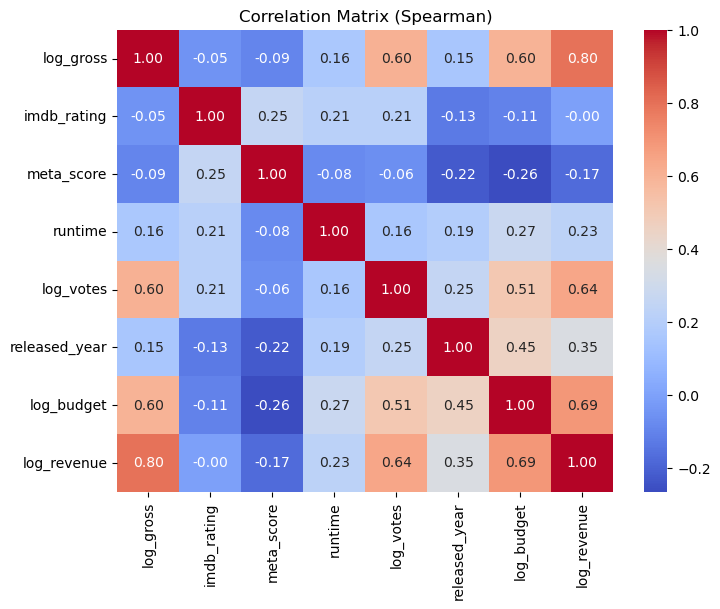

In [52]:
# Spearman correlation

num_cols = ['log_gross','imdb_rating','meta_score','runtime','log_votes','released_year', 'log_budget', 'log_revenue']
corr = df[num_cols].corr(method='spearman')
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Spearman)")
plt.show()

# (+)Positive strong correlations:
# 'gross' and 'no_of_votes' correlate strongly positive (ρ ≈ 0.6):
# movies with high gross reach a lot of people, and get more number of votes.

# 'gross' and 'log_budget' correlate strongly positive (ρ ≈ 0.6):
# higher budgets allow higher production value & marketing spend, enabling high gross, although doesn’t guarantee it

# 'gross' and 'log_revenue' correlate strongly positive (ρ ≈ 0.8):
# since gross is a subset of revenue

# (+)Positive weak correlations:
# 'runtime' and 'released_year'

# (-)Negative correlations:
# No significant negative correlation detected

# (0)Close to no correlation: 
# 'imdb_rating' and 'meta_score'

In [53]:
# 'gross' by 'main_genre'
# Ordering 'genres' acording to median 'gross' ranking

genre_gross = (
    df.groupby('main_genre')['log_gross']
    .median()
    .sort_values(ascending=False)
)

# By calculating the median 'log_gross' per 'main_genre', we see that:
# Horror, Action, Family, Biography, and Adventure tend to have the highest gross
# Animation, Fantasy, Mystery, Drama, Comedy tend to steady gross
# Thriller, Crime, Western, and Film-Noir typically have the lowest gross

# This shows that 'genre' can be a related factor, even when we account for outliers with the median
print(genre_gross)

main_genre
Horror       17.665658
Action       17.602764
Family       17.546458
Biography    17.420722
Adventure    17.271362
Animation    16.970698
Fantasy      16.970698
Mystery      16.970698
Drama        16.911965
Comedy       16.813496
Thriller     16.680607
Crime        16.664306
Western      16.073680
Film-Noir    14.561279
Name: log_gross, dtype: float64


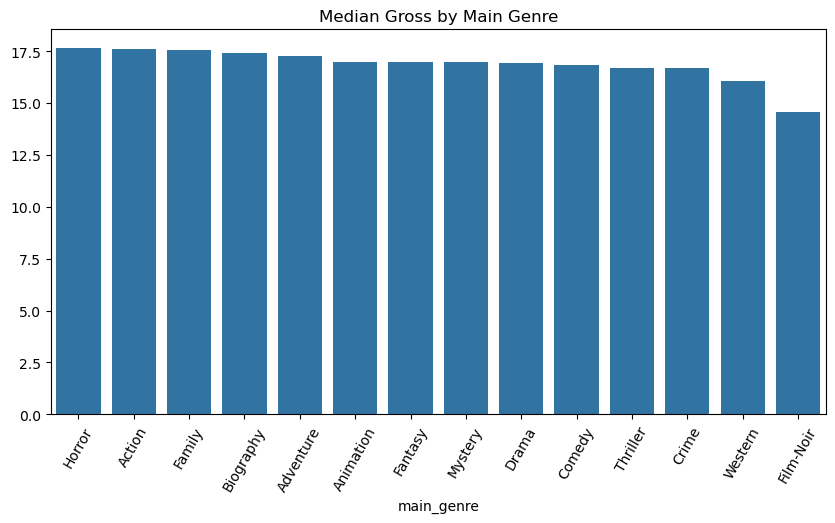

In [54]:
# 'gross' by 'main_genre'
# Visualizing 

plt.figure(figsize=(10,5))
sns.barplot(x=genre_gross.index, y=genre_gross.values)
plt.xticks(rotation=60)
plt.title("Median Gross by Main Genre")
plt.show()

In [55]:
# 'gross' by 'certificate'
# Ordering 'certificate' acording to median 'gross' ranking

certificate_gross = (
    df.groupby('certificate')['log_gross']
    .median()
    .sort_values(ascending=False)
)
print(certificate_gross)

# PG (Parental Guidance Suggested) tend to have the highest gross

certificate
PG         17.182206
G          16.970698
R          16.970698
PG-13      16.845316
Unrated    12.611541
Name: log_gross, dtype: float64


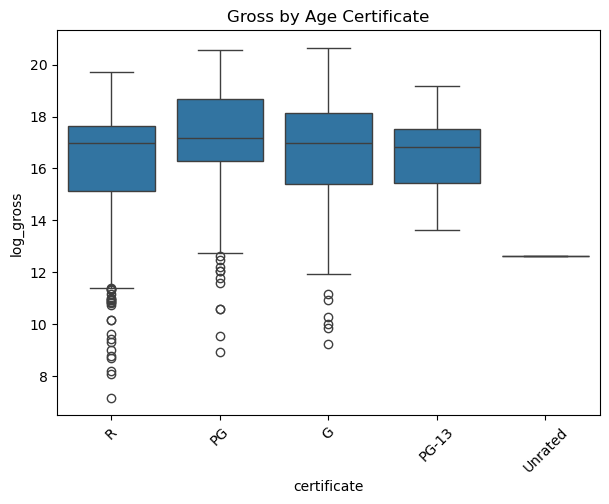

In [56]:
# 'gross' by 'certificate'
# Visualizing

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='certificate', y='log_gross')
plt.xticks(rotation=45)
plt.title("Gross by Age Certificate")
plt.show()

# Ouliters in 'R', 'PG', 'G'

In [57]:
# Top 5 'directors' by median 'gross'

top_directors = (
    df.groupby('director')['log_gross']
    .median()
    .sort_values(ascending=False)
    .head(5)
)

# Gareth Edwards, Anthony Russo, Josh Cooley, Roger Allers, Tim Miller are the top 5 directors making high-grossing movies
print(top_directors)

director
Gareth Edwards    20.092487
Anthony Russo     20.081422
Josh Cooley       19.888643
Roger Allers      19.862371
Tim Miller        19.710108
Name: log_gross, dtype: float64


#### Insights gained from the Overview column

Is it possible to infer the film's genre from the `overview` column?

Reasoning:
- Analyse the distribution of `main_genre`,
- Run TF-IDF + Logistic Regression model to test whether the `main_genre` can be inferred from the `overview` column.

**INSIGHTS**

TF-IDF + logistic regression baseline is capturing “Drama vs not-Drama”, but not fine genre distinctions.

That’s happens when:

- Genre imbalance exists (Drama is by far the majority)
- Many genres have too few training samples (e.g., Mystery support = 2)
- Overviews may not be distinct enough with bag-of-words features alone

With the current TF-IDF + logistic regression approach, the model is not able to reliably infer the film’s genre from the ‘overview’ column. Because ‘Drama’ is overrepresented in the dataset, the classifier defaults to predicting this genre, while underrepresented genres are almost never predicted. 

This indicates that the ***imbalance in the dataset*** and the ***generic nature of overviews*** limit the predictive power of this approach.

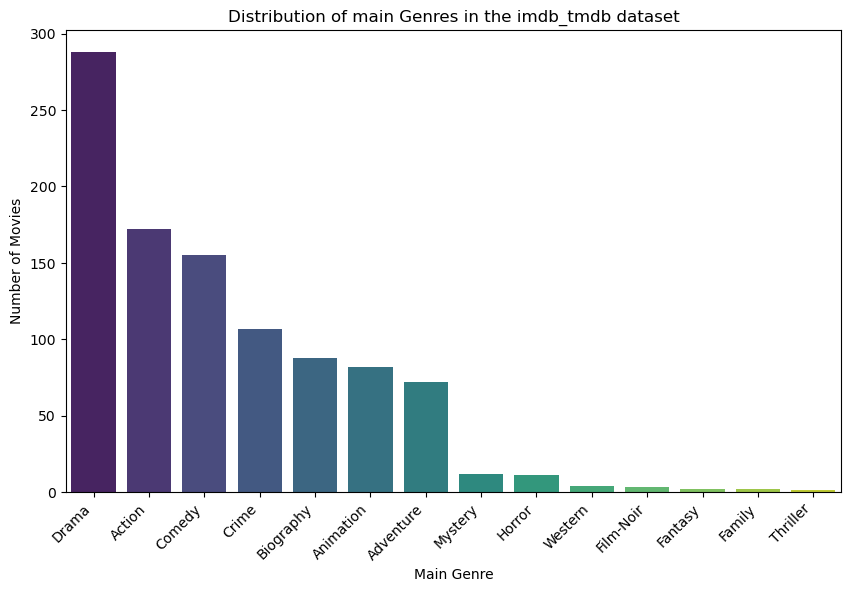

main_genre
Drama        28.83
Action       17.22
Comedy       15.52
Crime        10.71
Biography     8.81
Animation     8.21
Adventure     7.21
Mystery       1.20
Horror        1.10
Western       0.40
Film-Noir     0.30
Fantasy       0.20
Family        0.20
Thriller      0.10
Name: count, dtype: float64


In [58]:
# Distribution of 'main_genre'

plt.figure(figsize=(10,6))
genre_counts = df['main_genre'].value_counts()

sns.barplot(
    x=genre_counts.index,
    y=genre_counts.values,
    hue=genre_counts.index,
    palette="viridis",
    legend=False
)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Movies")
plt.xlabel("Main Genre")
plt.title("Distribution of main Genres in the imdb_tmdb dataset")
plt.show()

# Also show percentages
print((genre_counts / len(df) * 100).round(2))

# Insights
# 'main_genre' is heavily right-skewed
# Drama dominates: accounting for nearly 29% of all movies
# Other genres (Mistery, Horror, Western, Film-Noir, Fantasy, Family, Thriller) have very little representation.

In [59]:
# Genre inference (multi-class with 'main_genre' only)

# Splits the data into a training set and a held-out test set (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df['overview'], df['main_genre'], test_size=0.2, random_state=42
)

# Converts raw text into numeric vectors
# Each dimension is a word (or token) weighted by how important it is in a document relative to the corpus
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Learns a linear decision boundary in TF-IDF space to predict 'main_genre'
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

# Print per-genre precision, recall, F1, and support (number of true samples).
# Tells which genres the overview text predicts well and which are confused
print(classification_report(y_test, y_pred))

# Legend for the measures:
# Precision = (correct predictions of that genre) / (all movies predicted as that genre)
# High precision means the predicted genre is usually correct

# Recall = (correct predictions of that genre) / (all actual movies of that genre)
# High recall means the model finds most real examples of that genre

# F1 score = harmonic mean of precision & recall

# Support = how many test examples the true class has
# Small support means numbers are noisy

              precision    recall  f1-score   support

      Action       0.35      0.23      0.27        31
   Adventure       0.00      0.00      0.00        15
   Animation       0.00      0.00      0.00        18
   Biography       0.00      0.00      0.00        18
      Comedy       0.29      0.07      0.11        28
       Crime       1.00      0.04      0.08        23
       Drama       0.36      0.98      0.52        62
      Horror       0.00      0.00      0.00         3
     Mystery       0.00      0.00      0.00         2

    accuracy                           0.35       200
   macro avg       0.22      0.15      0.11       200
weighted avg       0.32      0.35      0.23       200



/Users/leticiazorzirama/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/leticiazorzirama/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/leticiazorzirama/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

**Overall accuracy = 35%**
- The model is getting about 1 in 3 overviews right — likely inflated by 'Drama' dominant genre.

**Drama**
- Drama recall = 0.98 (almost every true Drama is identified).
- Drama precision = 0.36 (many non-Drama movies are being mislabeled as Drama).
This suggests the model learned: “When in doubt, say Drama” — because it’s the most common genre.

**Other genres**
- Other genres collapse.
- Action (23% recall) has some signal.
- Comedy (7% recall) barely.
- Crime (4% recall).
- Everything else (Adventure, Animation, Biography, Horror, Mystery) 0 recall.
- That means the model almost never predicts them — it defaults to Drama (and occasionally Action/Comedy).

**zero_division**
- Most genres (Adventure, Animation, Biography, Horror, Mystery) have precision = recall = 0.00.
- That means the model never predicted them.
- This is why the UndefinedMetricWarning is showed: when a class is never predicted, precision is undefined (division by zero).
  
**Macro avg F1 = 0.11**
- That’s very poor. Macro treats all genres equally, so it exposes how badly minority genres are handled.

**Weighted avg F1 = 0.23** 
- It's weak — because Drama inflates it.

**INSIGHTS**

TF-IDF + Logistic Regression baseline is capturing “Drama vs not-Drama”, but not fine genre distinctions.

That’s happens when:
- Genre imbalance exists (Drama is by far the majority).
- Many genres have too few training samples (e.g., Mystery support = 2).
- Overviews may not be distinct enough with bag-of-words features alone.

With the current TF-IDF + logistic regression approach, the model is not able to reliably infer the film’s genre from the ‘overview’ column. Because ‘Drama’ is overrepresented in the dataset, the classifier defaults to predicting this genre, while underrepresented genres are almost never predicted.

This indicates that the ***imbalance in the dataset*** and the ***generic nature of overviews*** limit the predictive power of this approach.